In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def lorenz_system(t, W, sigma, r, b):
    """
    Implementation of the Lorenz system of equations.
    
    Parameters:
    t -------- Float-like, time point (not used in autonomous systems, but required by solve_ivp)
    W -------- Array-like, state vector [X, Y, Z]
    sigma ---- Float-like, Prandtl number (ratio of kinematic viscosity to thermal diffusivity)
    r -------- Float-like, Rayleigh number
    b -------- Float-like, dimensionless length scale
        
    Outputs:
    dW ------- Array-like, derivatives [dX/dt, dY/dt, dZ/dt]
    
    """
    X, Y, Z = W
    
    dX_dt = -sigma * (X - Y)
    dY_dt = r * X - Y - X * Z
    dZ_dt = -b * Z + X * Y
    
    return np.array([dX_dt, dY_dt, dZ_dt])

In [3]:
sigma = 10.0
r = 28.0
b = 8.0/3.0

# Initial conditions
W0 = np.array([0.0, 1.0, 0.0])

# Time span for integration
t_span = (0, 60)
dt = 0.01
t_eval = np.linspace(0, 60, int(60/dt) + 1)  # Output points

# Solve the ODE system
sol = solve_ivp(
    lambda t, W: lorenz_system(t, W, sigma, r, b),
    t_span,
    W0,
    method='RK45',
    t_eval=t_eval,
    rtol=1e-10,
    atol=1e-10
)

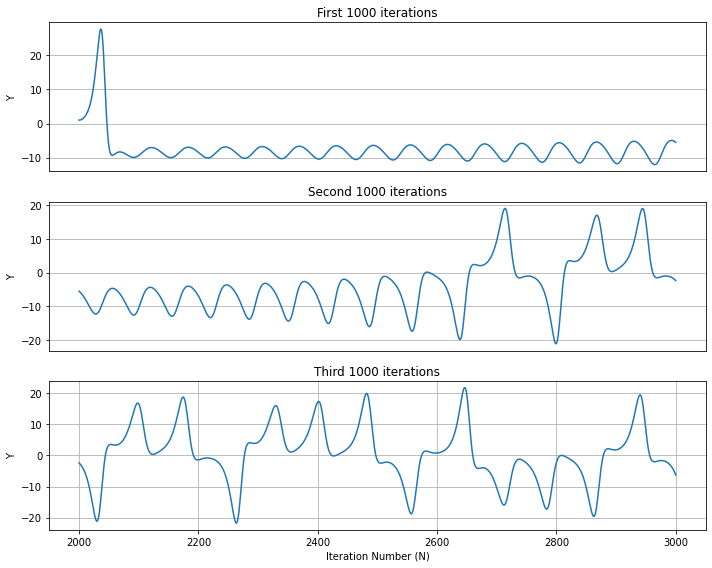

In [6]:
t = sol.t
X = sol.y[0]
Y = sol.y[1]
Z = sol.y[2]

# Create iteration numbers
N = np.arange(len(t))

# Plot Lorenz's Figure 1: Y vs iteration number N in three sections
plt.figure(figsize=(10, 8))

# First 1000 iterations
plt.subplot(3, 1, 1)
plt.plot(N[:1001], Y[:1001])
plt.ylabel('Y')
plt.title('First 1000 iterations')
plt.grid(True)
plt.xticks([])  

# Second 1000 iterations
plt.subplot(3, 1, 2)
plt.plot(N[1000:2001], Y[1000:2001])
plt.ylabel('Y')
plt.title('Second 1000 iterations')
plt.grid(True)
plt.xticks([])  

# Third 1000 iterations
plt.subplot(3, 1, 3)
plt.plot(N[2000:3001], Y[2000:3001])
plt.xlabel('Iteration Number (N)')
plt.ylabel('Y')
plt.title('Third 1000 iterations')
plt.grid(True)

plt.tight_layout()
plt.savefig('lorenz_figure1.pdf') 
plt.show()

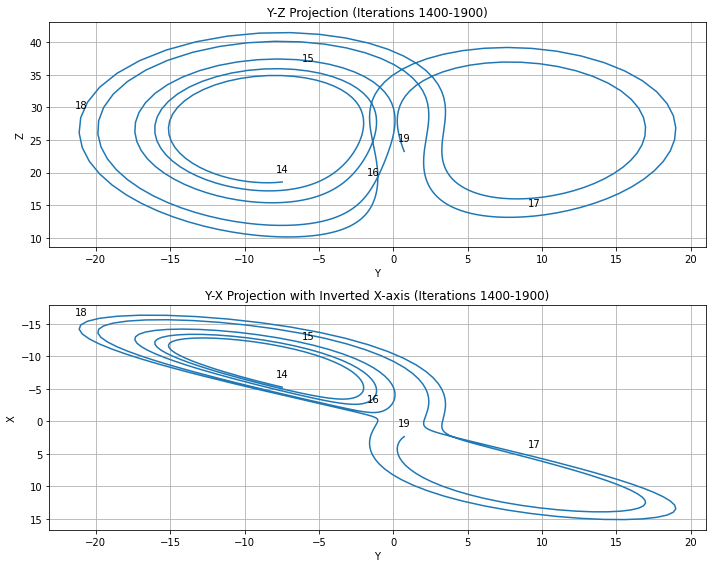

In [7]:
start_idx = 1400
end_idx = 1901  
X_segment = X[start_idx:end_idx]
Y_segment = Y[start_idx:end_idx]
Z_segment = Z[start_idx:end_idx]
# Extract positions at iterations 1400, 1500, etc. for labeling
label_idxs = [1400, 1500, 1600, 1700, 1800, 1900]
label_positions = [(X[i], Y[i]) for i in label_idxs]
label_positions_yz = [(Y[i], Z[i]) for i in label_idxs]
labels = ['14', '15', '16', '17', '18', '19']

# Plot Lorenz's Figure 2: X-Y and Y-Z projections
plt.figure(figsize=(10, 8))

# Y-Z projection (top)
plt.subplot(2, 1, 1)
plt.plot(Y_segment, Z_segment)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Y-Z Projection (Iterations 1400-1900)')
plt.grid(True)
for (y, z), label in zip(label_positions_yz, labels):
    plt.annotate(label, (y, z), textcoords="offset points", xytext=(0,10), ha='center')

# Y-X projection (bottom) with Y on x-axis and X on y-axis (inverted)
plt.subplot(2, 1, 2)
plt.plot(Y_segment, X_segment)  # Plot Y on x-axis, X on y-axis
plt.xlabel('Y')
plt.ylabel('X')
plt.title('Y-X Projection with Inverted X-axis (Iterations 1400-1900)')
plt.grid(True)
# Flip the y-axis so it increases downward (this is the only inversion we need)
plt.gca().invert_yaxis()
# Update label positions for new orientation
for (x, y), label in zip(label_positions, labels):
    plt.annotate(label, (y, x), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('lorenz_figure2.pdf') 
plt.show()

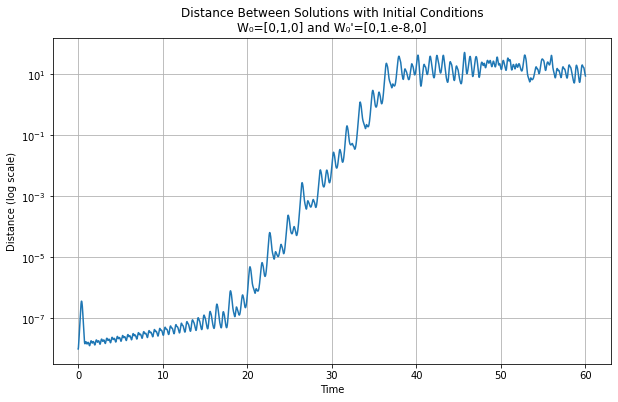

In [8]:
W0_prime = [0., 1.00000001, 0.] 

sol_perturbed = solve_ivp(
    lambda t, W: lorenz_system(t, W, sigma, r, b),
    t_span,
    W0_prime,
    method='RK45',
    t_eval=t_eval,
    rtol=1e-10,
    atol=1e-10
)

# Calculate Euclidean distance between the two solutions at each time point
distances = np.sqrt(np.sum((sol.y - sol_perturbed.y)**2, axis=0))

# Plot distance on a semilog plot (linear time, log distance)
plt.figure(figsize=(10, 6))
plt.semilogy(t, distances)
plt.xlabel('Time')
plt.ylabel('Distance (log scale)')
plt.title('Distance Between Solutions with Initial Conditions\nW₀=[0,1,0] and W₀\'=[0,1.e-8,0]')
plt.grid(True)
plt.savefig('lorenz_sensitivity.pdf')
plt.show()